In [1]:
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
#from sklearn.externals.six import StringIO 
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [2]:
data=pd.read_csv(r"D:\ineuron\MachineLearningFiles\MLAlgos\ML2\DecisionTree\Decision tree\winequality_red.csv")
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [4]:
x=data.drop(columns="quality")
y=data["quality"]

In [5]:
x.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [6]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [7]:
type(y)

pandas.core.series.Series

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=355)

In [9]:
x_train.shape

(1119, 11)

In [10]:
x_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1125            8.8              0.24         0.35             1.7      0.055   
627             8.8              0.60         0.29             2.2      0.098   
1421            7.5              0.40         0.18             1.6      0.079   
832            10.4              0.44         0.42             1.5      0.145   
528             8.2              0.42         0.49             2.6      0.084   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1125                 13.0                  27.0  0.99394  3.14       0.59   
627                   5.0                  15.0  0.99880  3.36       0.49   
1421                 24.0                  58.0  0.99650  3.34       0.58   
832                  34.0                  48.0  0.99832  3.38       0.86   
528                  32.0                  55.0  0.99880  3.34       0.75   

      alcohol  
1125     11.3  
627       9.1  
1421      9.4  
832       9.9  
528       8.7

In [11]:
y_train.shape

(1119,)

In [12]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
feature_name=list(x.columns)
class_name=list(y_train.unique())
print(feature_name)
print(class_name)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
[7, 5, 3, 6, 4, 8]


In [14]:
dot_data=export_graphviz(clf,feature_names=feature_name,rounded=True,filled=True)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_png("MyTree.png")
Image(graph.create_png())

In [15]:
clf.score(x_train,y_train)

1.0

In [16]:
clf.score(x_test,y_test)

0.6208333333333333

In [17]:
py_pred=clf.predict(x_test)
py_pred

array([5, 5, 5, 5, 7, 6, 5, 7, 5, 6, 5, 6, 6, 4, 7, 6, 6, 7, 7, 7, 6, 5,
       5, 6, 6, 6, 5, 5, 6, 8, 5, 7, 6, 6, 7, 6, 5, 6, 6, 7, 3, 6, 5, 5,
       6, 6, 6, 6, 6, 6, 4, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 7, 6,
       8, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 4, 7, 5, 5, 7, 5, 5, 5, 5,
       5, 5, 6, 7, 6, 7, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 7, 7, 6, 5,
       6, 7, 5, 5, 4, 6, 5, 7, 4, 6, 5, 6, 5, 5, 7, 7, 5, 6, 5, 6, 6, 7,
       5, 5, 7, 6, 5, 8, 5, 5, 5, 7, 7, 6, 8, 7, 5, 5, 6, 6, 6, 7, 5, 6,
       6, 5, 5, 6, 7, 5, 6, 6, 5, 6, 5, 7, 6, 6, 6, 5, 6, 6, 8, 7, 5, 6,
       7, 7, 5, 7, 5, 6, 6, 6, 6, 7, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 7,
       7, 4, 6, 5, 6, 5, 7, 5, 5, 6, 6, 5, 7, 8, 7, 5, 5, 5, 6, 7, 5, 5,
       6, 6, 5, 5, 5, 5, 5, 8, 5, 6, 5, 6, 5, 5, 6, 7, 5, 5, 5, 5, 5, 5,
       5, 5, 6, 7, 6, 4, 5, 5, 6, 5, 5, 7, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5,
       5, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 7, 5, 7, 5, 7, 6,
       6, 7, 6, 6, 5, 5, 5, 5, 5, 5, 5, 7, 7, 5, 7,

In [18]:
clf.predict([[7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4]])

array([5], dtype=int64)

In [19]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param ={
    "criterion" :["gini","entrophy"],
    "max_depth" : range(2,32,3),
    "min_samples_leaf" :range(1,10,1),
    "min_samples_split" :range(2,10,1),
    "splitter" : ["best","random"]
}

In [20]:
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=6,n_jobs=-1)

In [21]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entrophy'],
                         'max_depth': range(2, 32, 3),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [22]:
best_parameters=grid_search.best_params_
best_parameters

{'criterion': 'gini',
 'max_depth': 26,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [23]:
clf=DecisionTreeClassifier(criterion="gini",max_depth=17,min_samples_leaf=4,min_samples_split=8,splitter="random")
clf.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=17, min_samples_leaf=4, min_samples_split=8,
                       splitter='random')

In [24]:
print(clf.score(x_train,y_train))
print(clf.score(x_test,y_test))

0.7613941018766756
0.5708333333333333


In [25]:
feature_name=list(x.columns)
class_name=list(y.unique())
print(feature_name)
print(class_name)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
[5, 6, 7, 4, 8, 3]


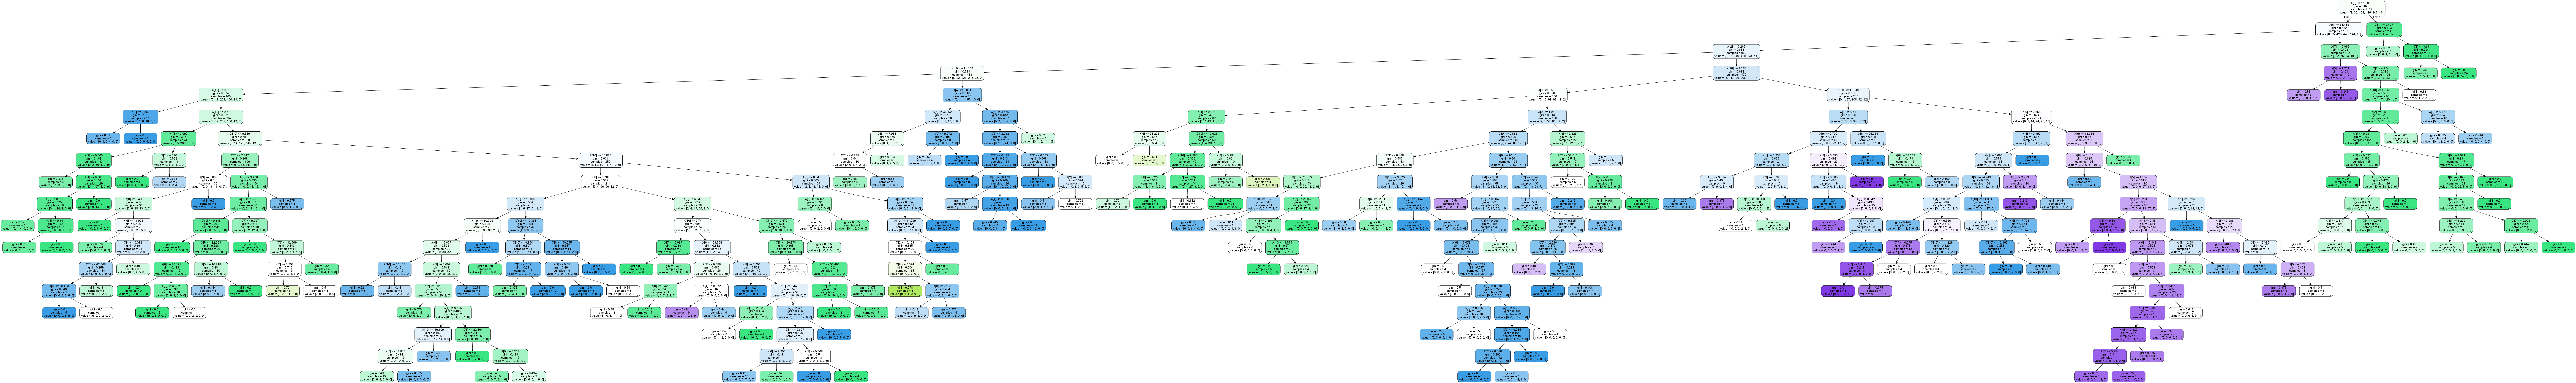

In [33]:
dot_data=export_graphviz(clf,rounded=True,filled=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [58]:
##Random Forest Practice

In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [27]:
from sklearn.datasets import load_breast_cancer
dataset=load_breast_cancer()
x=dataset.data
y=dataset.target

In [28]:
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [29]:
from sklearn.datasets import load_breast_cancer
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

In [31]:
x_train.shape

(426, 30)

In [32]:
x_test.shape

(143, 30)

In [33]:
#KNN
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.916083916083916

In [34]:
#Bagging
bag_knn=BaggingClassifier(KNeighborsClassifier(n_neighbors=5),n_estimators=10,max_samples=0.5,bootstrap=True,random_state=3,oob_score=3)
bag_knn.fit(x_train,y_train)
bag_knn.score(x_test,y_test)

0.9370629370629371

In [35]:
#Pasting - Replacement = False and Bootstap a False
pasting_knn=BaggingClassifier(KNeighborsClassifier(n_neighbors=5),n_estimators=10,max_samples=0.5,bootstrap=False,random_state=3)
pasting_knn.fit(x_train,y_train)
pasting_knn.score(x_test,y_test)

0.9300699300699301

In [36]:
##Trying the same thing with decesion Tree Classifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.9440559440559441

In [37]:
##Trying out Random Forest Algorithm
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
#from sklearn.externals.six import StringIO 
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [38]:
data=pd.read_csv(r"D:\ineuron\MachineLearningFiles\MLAlgos\ML2\DecisionTree\Decision tree\winequality_red.csv")
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [39]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [40]:
x=data.drop(columns=["quality"])
y=data["quality"]

In [41]:
x.head()
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state= 355)

In [43]:
#let's first visualize the tree on the data without doing any pre processing
clf=DecisionTreeClassifier(min_samples_split=2)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.6145833333333334

In [44]:
clf2=DecisionTreeClassifier(criterion="entropy",max_depth=24,min_samples_leaf=1)
clf2.fit(x_train,y_train)
clf2.score(x_test,y_test)

0.6104166666666667

In [45]:
#Random Forest Classifier
rand_clf=RandomForestClassifier(random_state=6)
rand_clf

RandomForestClassifier(random_state=6)

In [46]:
rand_clf.fit(x_train,y_train)
rand_clf.score(x_test,y_test)

0.6708333333333333

In [47]:
#2 individual decision trees have both less score than a single random forest classifier.

#So, using random forest classifier has increased the predicitive power of our model.

In [48]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [49]:
#Tryig with grid search
#grid_search
grid_search=GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs=-1,verbose=3)
grid_search.fit(x_train,y_train)
#grid_search.score(x_test,y_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 20736 candidates, totalling 103680 fits


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:  2.1min


KeyboardInterrupt: 

In [120]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 115}

In [50]:
rand_clf=RandomForestClassifier(criterion= 'entropy',
 max_depth= 11,
 max_features= 'auto',
 min_samples_leaf= 2,
 min_samples_split= 2,
 n_estimators= 115,random_state=6)


In [51]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=2,
                       n_estimators=115, random_state=6)

In [52]:
rand_clf.score(x_test,y_test)

0.65625

In [53]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['auto','log2']
}

In [ ]:
grid_search=GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs=-1,verbose=3)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:   39.2s


In [54]:
grid_search.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [55]:
rand_clf=RandomForestClassifier(criterion= 'entropy',
 max_features= 'auto',
 min_samples_leaf= 2,
 min_samples_split= 4,
 n_estimators= 115,random_state=6)
rand_clf.fit(x_train,y_train)
rand_clf.score(x_test,y_test)

0.65625

In [ ]:
rand_clf.fit(x_train,y_train)
rand_clf.score(x_test,y_test)

In [ ]:
import pickle

with open('D:\ineuron_materials_ipynb\iNeuron\EnsembleLearning_And_RandomForest'+ '/modelForPrediction.sav', 'wb') as f:
    pickle.dump(rand_clf,f)
